<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Generating random data that will be close to linear when plotted
x_axis = np.arange(0.0, 26.0, 1.0)
y_axis = 2.0 * x_axis + 5 + np.random.normal(0.0, 2.5, x_axis.size)

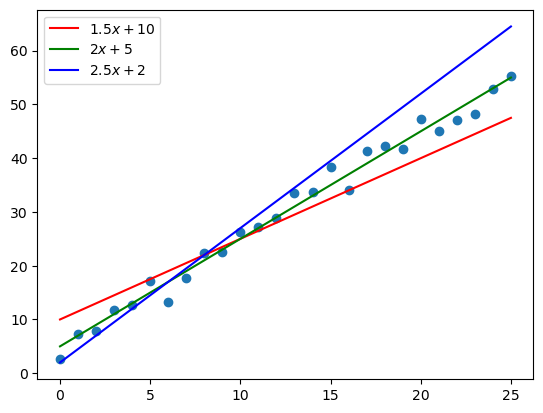

In [50]:
plt.plot(x_axis, y_axis, "o")

# Overlay some lines on the plot.
x = np.arange(0.0, 26.0, 1.0)
plt.plot(x, 1.5 * x + 10, 'r-', label=r"$1.5x + 10$")
plt.plot(x, 2 * x +  5.0, 'g-', label=r"$2x +  5$")
plt.plot(x, 2.5 * x + 2, 'b-', label=r"$2.5x + 2$")

# Add a legend.
plt.legend()